Line Plot for COVID-19 Dataset to show Number of cases By Week:


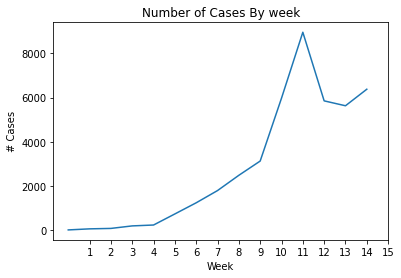

In [34]:
# Line Chart
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as pPic

print('Line Plot for COVID-19 Dataset to show Number of cases By Week:')
#Reading
url = 'https://github.com/sumayahamdan/MyFiles/blob/master/FinalResult1.xls?raw=true'
MyData = pd.read_excel(url, sheet_name='Sheet1')
#MyData = pd.read_excel("/content/FinalResult.xlsx")
#print(MyData)

#Set index
MyData.set_index('Indicator', inplace= True)
#print(MyData)

#Add Week Column
MyData['Week'] = MyData['Date'].dt.week - 9
#print(MyData)

#Make groupby
MyNewData = MyData.groupby(['Week'], axis= 0, as_index= False).sum()
#print(MyNewData)

#Draw Line Chart
MyNewData['Cases'].plot(kind='line')
pPic.xticks(MyNewData['Week'])
pPic.xlabel('Week')
pPic.ylabel('# Cases')
pPic.title('Number of Cases By week')
pPic.show()

Line Plot for COVID-19 Dataset to show Number of cases By Week categorized by indecator:


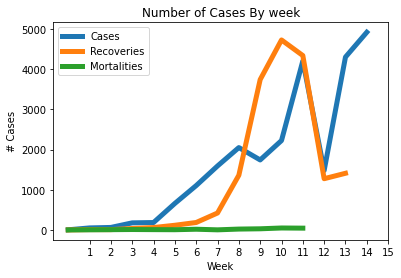

In [28]:
# Test Line Chart
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as pPic

print('Line Plot for COVID-19 Dataset to show Number of cases By Week categorized by indecator:')


#Reading
url = 'https://github.com/sumayahamdan/MyFiles/blob/master/FinalResult1.xls?raw=true'
MyData = pd.read_excel(url, sheet_name='Sheet1')

#MyData = pd.read_excel("/content/FinalResult.xlsx")
#print(MyData)

#Set index
#MyData.set_index('Indicator', inplace= True)
#print(MyData)

#Add Week Column
MyData['Week'] = MyData['Date'].dt.week - 9
MyDataC = MyData.loc[MyData['Indicator'] == 'Cases']
MyDataR = MyData.loc[MyData['Indicator'] == 'Recoveries']
MyDataM = MyData.loc[MyData['Indicator'] == 'Mortalities']


#print(MyDataC)

#Make groupby
MyDataC = MyDataC.groupby(['Week'], axis= 0, as_index= False).sum()
MyDataR = MyDataR.groupby(['Week'], axis= 0, as_index= False).sum()
MyDataM = MyDataM.groupby(['Week'], axis= 0, as_index= False).sum()


#Draw Line Chart
MyDataC['Cases'].plot(kind='line', label='Cases', linewidth=5)
MyDataR['Cases'].plot(kind='line', label='Recoveries', linewidth=5)
MyDataM['Cases'].plot(kind='line', label='Mortalities', linewidth=5)
pPic.legend()

pPic.xticks(MyNewData['Week'])
pPic.xlabel('Week')
pPic.ylabel('# Cases')
pPic.title('Number of Cases By week')
pPic.show()

Area Plot for COVID-19 Dataset to Top 5 Cities:


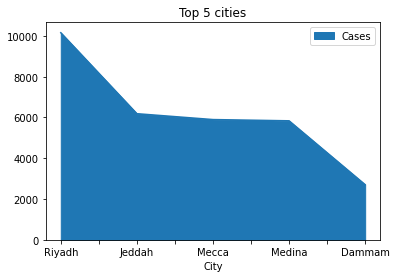

In [29]:
# Area Chart
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as pPic

print('Area Plot for COVID-19 Dataset to Top 5 Cities:')

#Reading
url = 'https://github.com/sumayahamdan/MyFiles/blob/master/FinalResult1.xls?raw=true'
MyData = pd.read_excel(url, sheet_name='Sheet1')

#MyData = pd.read_excel("/content/FinalResult.xlsx")
#print(MyData)

#Set index
MyData.set_index('Indicator', inplace= True)
#print(MyData)

#Make groupby on regioCityn
MyDataNew = MyData.groupby(['City'], axis= 0).sum()
#print(MyDataNew)

#Sorting
MyDataNew.sort_values(['Cases'], ascending = False, axis = 0, inplace = True)
MyDataNew = MyDataNew.head(5)
#print(MyDataNew)

#Draw Area Chart
MyDataNew.plot(kind='area')
pPic.title('Top 5 cities')
pPic.show()

In [ ]:
#Pie Chart
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as pPic

print('PIE Chart for COVID-19 Dataset to show Number of cases By Region:')


#Reading
url = 'https://github.com/sumayahamdan/MyFiles/blob/master/FinalResult1.xls?raw=true'
MyData = pd.read_excel(url, sheet_name='Sheet1')
#MyData = pd.read_excel("/content/FinalResult.xlsx")
#print(MyData)

#Set index
MyData.set_index('Indicator', inplace= True)
#print(MyData)

#Make groupby on region
MyDataNew = MyData.groupby('region', axis= 0).sum()
#print(MyDataNew)

#Draw Chart
MyDataNew['Cases'].plot(kind = 'pie',subplots=True, figsize=(8,8))
pPic.title('Total Cases By Regions')
pPic.show()

In [31]:
#Geospatial maps
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as pPic
import folium
import json

print('A map shows the cases distribution of COVID-19 in saudi regions')


#Reading
url = 'https://github.com/sumayahamdan/MyFiles/blob/master/FinalResult1.xls?raw=true'
MyData = pd.read_excel(url, sheet_name='Sheet1')

#MyData = pd.read_excel("/content/FinalResult.xlsx")
#print(MyData)

#Set index
MyData.set_index('Indicator', inplace= True)
#print(MyData)

#Make groupby on region
#MyDataNew = MyData.groupby('region', axis= 0).sum()
#print(MyDataNew)

#Draw Chart
#url = 'https://github.com/homaily/Saudi-Arabia-Regions-Cities-and-Districts/tree/master/json'
url = 'https://github.com/sumayahamdan/MyJson'
#url = 'https://github.com/wjdanalharthi/GeoJSON-of-Saudi-Arabia-Regions'
#region_geo = f'{url}/SA_regions.json'
region_geo = f'{url}/sr.json'
#print(type(region_geo))
#region_geo = f'/content/sr.json'
#print(list(region_geo.columns))

#saudi_regions = MyData.read_json("/content/r.json")
RegionCase = MyData.groupby('region', axis= 0, as_index = False).sum()

#RegionCase['Cases'] = RegionCase['Cases'].astype('int64').astype('subject')
#RegionCase = MyData['region', 'Cases']
#print(RegionCase)
#print(list(RegionCase.columns))
saudi_map = folium.Map(location = [23.885942, 45.079163], zoom_start = 5)

folium.Choropleth(
    geo_data = region_geo,
    name = 'choropleth',
    data = RegionCase,
    columns = ['region', 'Cases'],
    key_on = 'feature.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name = 'Cases By Region'
).add_to(saudi_map)

folium.LayerControl().add_to(saudi_map)

saudi_map


A map shows the cases distribution of COVID-19 in saudi regions
